In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv("Cars Datasets 2025.csv", encoding='ISO-8859-1')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [9]:
df.shape

(1218, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [16]:
pd.isnull(df)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1213,False,False,False,False,False,False,False,False,False,False,False
1214,False,False,False,False,False,False,False,False,False,False,False
1215,False,False,False,False,False,False,False,False,False,False,False
1216,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64

In [19]:
df.shape

(1210, 11)

In [22]:
df.describe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
unique,37,1193,350,309,453,113,180,533,21,17,262
top,Nissan,Jetta Hybrid,I4,"2,000 cc",355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,148,2,64,31,23,144,45,36,871,691,72


In [25]:
df[['Company Names','Cars Names','Cars Prices']].describe()

,Company Names,Cars Names,Cars Prices
count,1210,1210,1210
unique,37,1193,533
top,Nissan,Jetta Hybrid,"$35,000"
freq,148,2,36


In [20]:
df.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

In [26]:
X = df.drop("Cars Prices", axis=1)
y = df["Cars Prices"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (968, 10)
X_test: (242, 10)
y_train: (968,)
y_test: (242,)


In [27]:
num_cols = ['CC/Battery Capacity', 'HorsePower', 'Total Speed',             # Handle missing values
            'Performance(0 - 100 )KM/H', 'Cars Prices', 'Torque', 'Seats']


In [28]:
for col in num_cols:
    df[col] = df[col].str.extract(r'([\d.]+)').astype(float)

In [29]:
for col in num_cols:                                     # (missing numeric values with median)
    df[col] = df[col].fillna(df[col].median())


cat_cols = df.select_dtypes(include='object').columns   # (Fill remaining categorical missing values )
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df = pd.get_dummies(df, drop_first=True)

In [31]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

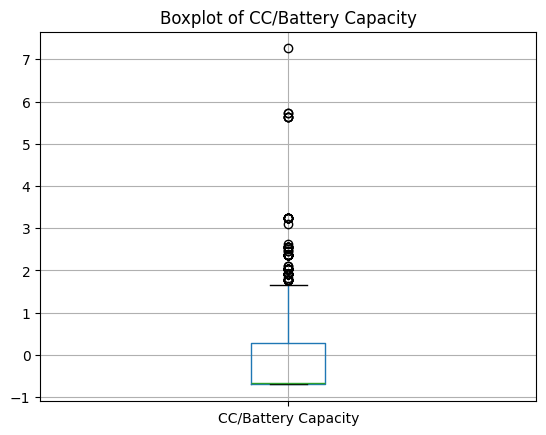

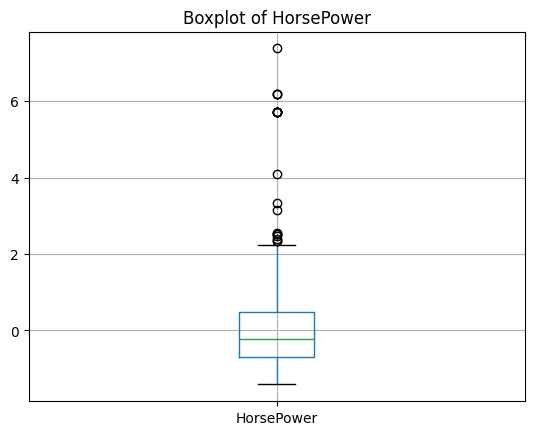

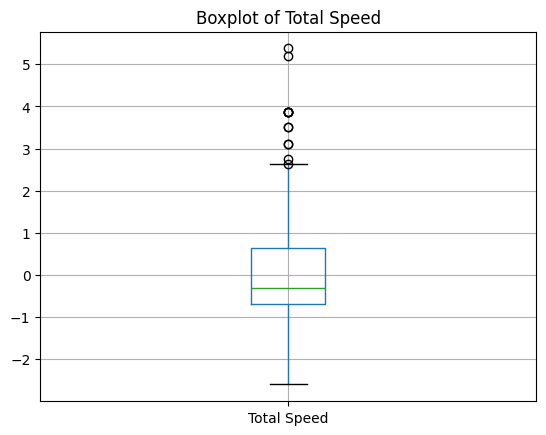

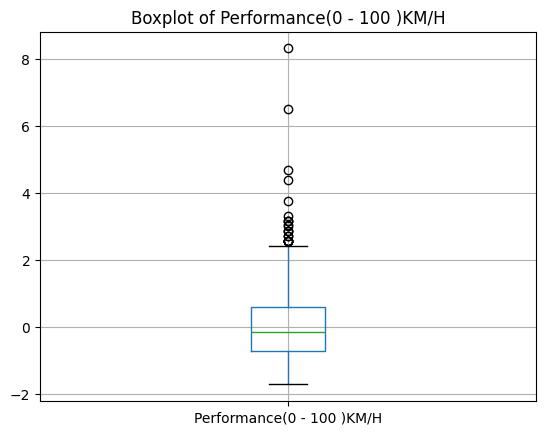

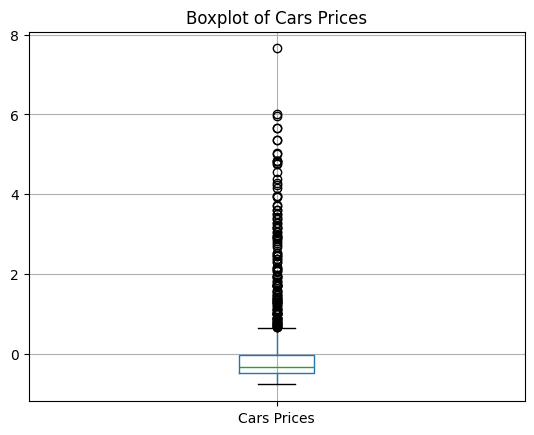

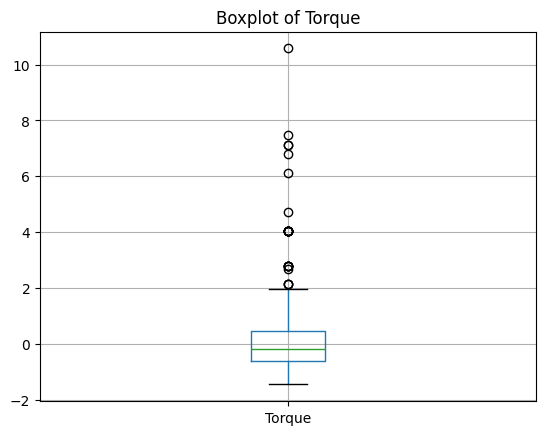

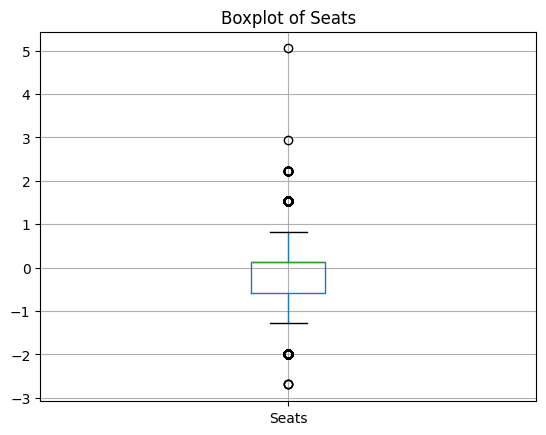

In [32]:
for col in num_cols:
    plt.figure()
    df.boxplot(column=[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [33]:
for col in num_cols:                        # Remove outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]